# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Analysis

Trend 1

    The closer you are to the equater, the hotter it gets. 

Trend 2

    Coordinates don't seem to determine much in terms of humdidity  or windspeed. 

Trend 3
    
    Windspeeds are fairly stable throughout the wortld, with very few outliers. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key

'193421888ad09cbf01d51768678c4ba6'

## Generate Cities List

In [2]:
# empty lists for location and cities
lat_long = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lng = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_long = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities

['cockburn town',
 'casablanca',
 'shiyan',
 'piacabucu',
 'hobart',
 'ushuaia',
 'punta arenas',
 'katete',
 'mataura',
 'jamestown',
 'albany',
 'paita',
 'kjollefjord',
 'tsihombe',
 'portland',
 'port keats',
 'calamar',
 'butaritari',
 'moron',
 'palmer',
 'barrow',
 'champerico',
 'lata',
 'comodoro rivadavia',
 'cape town',
 'puerto ayora',
 'yellowknife',
 'vaini',
 'murgab',
 'nanakuli',
 'rock sound',
 'mariestad',
 'saint-philippe',
 'polson',
 'cherskiy',
 'barentsburg',
 'kpandae',
 'pierre',
 'tasiilaq',
 'hermanus',
 'illoqqortoormiut',
 'belushya guba',
 'rikitea',
 'pulaski',
 'pathein',
 'alexandria',
 'bathsheba',
 'taolanaro',
 'esperance',
 'afonino',
 'norman wells',
 'iquique',
 'georgetown',
 'bluff',
 'sitka',
 'kapaa',
 'mahon',
 'hithadhoo',
 'kodiak',
 'sibenik',
 'port lincoln',
 'saskylakh',
 'puranpur',
 'hendek',
 'chokurdakh',
 'alofi',
 'arraial do cabo',
 'avarua',
 'bredasdorp',
 'port alfred',
 'iqaluit',
 'haradok',
 'ribeira grande',
 'new norfolk

In [3]:
city_test = ['Ajax', 'Kiev', 'Kingsotn', 'Cluj-Napoca', 'Denver', 'Berlin', 'Beijing', 'Geneva', 'San Francisco', 
             'Jamaica','Jen','Beyonce', 'George', 'London']

#URL for API extraction
base_url = f"http://api.openweathermap.org/data/2.5/weather?&appid={api_key}&q="

#Empty list and value for city
c_test = []
c_number=1

#Print log 
for i in city_test:
    c_url = base_url + i
    response_t= requests.get(c_url).json()

    try:
        c_test.append(response_t['name'])
        print(f"Record {c_number} of|{i}")
        c_number +=1
        
    except:
        print(f"Not found.  Next!")
        pass

Record 1 of|Ajax
Record 2 of|Kiev
Not found.  Next!
Record 3 of|Cluj-Napoca
Record 4 of|Denver
Record 5 of|Berlin
Record 6 of|Beijing
Record 7 of|Geneva
Record 8 of|San Francisco
Record 9 of|Jamaica
Record 10 of|Jen
Not found.  Next!
Record 11 of|George
Record 12 of|London


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#API Calls
#Perform a weather check on each city using a series of successive API calls.
#Perform a quick test by coming up with a list of cities with successive API calls.  
# Create empty lists for dataframe to plot data

city = []
temp_max = []
cloud = []
humid = []
wind = []
lat = []
long = []
date= []
country = []

print("Retreive Data")
print("..............................")

# Value for record and count
record = 1
set_number = 1

# Loop through the cities in the full cities list 
# Also, to get a print log of all the cities found 



for city in cities:
    weather_url = base_url + city
    response= requests.get(weather_url + "&units=metric").json()

    try:
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        print(f"Getting city {record} of set {set_number}|{city}")
        
        # record and set count
        if record > 49:
            record = 1
            set_number += 1
            cityname.append(city)
        else:
            record += 1
            cityname.append(city)
    except:
        # Append null values
        print(f"Not found. Next....")
        pass
print("-----------------------------")
print("Complete!") 
print("-----------------------------")

Retreive Data
..............................
Getting city 1 of set 1|cockburn town
Not found. Next....
Getting city 2 of set 1|casablanca
Not found. Next....
Getting city 3 of set 1|shiyan
Not found. Next....
Getting city 4 of set 1|piacabucu
Not found. Next....
Getting city 5 of set 1|hobart
Not found. Next....
Getting city 6 of set 1|ushuaia
Not found. Next....
Getting city 7 of set 1|punta arenas
Not found. Next....
Getting city 8 of set 1|katete
Not found. Next....
Getting city 9 of set 1|mataura
Not found. Next....
Getting city 10 of set 1|jamestown
Not found. Next....
Getting city 11 of set 1|albany
Not found. Next....
Getting city 12 of set 1|paita
Not found. Next....
Getting city 13 of set 1|kjollefjord
Not found. Next....
Not found. Next....
Getting city 14 of set 1|portland
Not found. Next....
Getting city 15 of set 1|port keats
Not found. Next....
Getting city 16 of set 1|calamar
Not found. Next....
Getting city 17 of set 1|butaritari
Not found. Next....
Getting city 18 of s

Getting city 49 of set 3|usinsk
Not found. Next....
Getting city 50 of set 3|dikson
Not found. Next....
Getting city 1 of set 4|tateyama
Not found. Next....
Getting city 2 of set 4|carballo
Not found. Next....
Getting city 3 of set 4|xudat
Not found. Next....
Not found. Next....
Getting city 4 of set 4|myitkyina
Not found. Next....
Getting city 5 of set 4|dingle
Not found. Next....
Getting city 6 of set 4|deputatskiy
Not found. Next....
Getting city 7 of set 4|kruisfontein
Not found. Next....
Getting city 8 of set 4|kahului
Not found. Next....
Getting city 9 of set 4|saint-augustin
Not found. Next....
Getting city 10 of set 4|torbay
Not found. Next....
Getting city 11 of set 4|alugan
Not found. Next....
Getting city 12 of set 4|nueva loja
Not found. Next....
Getting city 13 of set 4|yarmouth
Not found. Next....
Getting city 14 of set 4|ucluelet
Not found. Next....
Not found. Next....
Getting city 15 of set 4|talnakh
Not found. Next....
Getting city 16 of set 4|soyo
Not found. Next....


Getting city 44 of set 6|ponta do sol
Not found. Next....
Getting city 45 of set 6|kushiro
Not found. Next....
Getting city 46 of set 6|norton
Not found. Next....
Not found. Next....
Getting city 47 of set 6|katsuura
Not found. Next....
Getting city 48 of set 6|san lawrenz
Not found. Next....
Getting city 49 of set 6|berbera
Not found. Next....
Getting city 50 of set 6|omboue
Not found. Next....
Getting city 1 of set 7|amahai
Not found. Next....
Getting city 2 of set 7|inuvik
Not found. Next....
Getting city 3 of set 7|yaan
Not found. Next....
Getting city 4 of set 7|waingapu
Not found. Next....
Getting city 5 of set 7|xingyi
Not found. Next....
Getting city 6 of set 7|oranjemund
Not found. Next....
Getting city 7 of set 7|yarada
Not found. Next....
Getting city 8 of set 7|olean
Not found. Next....
Getting city 9 of set 7|virginia beach
Not found. Next....
Getting city 10 of set 7|east london
Not found. Next....
Getting city 11 of set 7|chuy
Not found. Next....
Getting city 12 of set 7

Getting city 42 of set 9|yakeshi
Not found. Next....
Getting city 43 of set 9|mayo
Not found. Next....
Getting city 44 of set 9|bonthe
Not found. Next....
Getting city 45 of set 9|togur
Not found. Next....
Getting city 46 of set 9|dahuk
Not found. Next....
Getting city 47 of set 9|araxa
Not found. Next....
Getting city 48 of set 9|arkansas city
Not found. Next....
Getting city 49 of set 9|ayan
Not found. Next....
Getting city 50 of set 9|saint-pierre
Not found. Next....
Getting city 1 of set 10|chalus
Not found. Next....
Getting city 2 of set 10|pisco
Not found. Next....
Not found. Next....
Getting city 3 of set 10|cacu
Not found. Next....
Getting city 4 of set 10|suhbaatar
Not found. Next....
Getting city 5 of set 10|nanyamba
Not found. Next....
Getting city 6 of set 10|umm lajj
Not found. Next....
Getting city 7 of set 10|ancud
Not found. Next....
Getting city 8 of set 10|coquimbo
Not found. Next....
Getting city 9 of set 10|port hedland
Not found. Next....
Getting city 10 of set 10|

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:

#Dataframe creation
weather_frame = pd.DataFrame({
    'City': city,
    'Cloudiness': cloud,
    'Country': country,
    'Date': date,
    'Humidity': humid,
    'Latitude': lat,
    'Longitude': long,
    'Max Temp': temp_max,
    'Windspeed': wind
    
})



In [6]:
weather_frame.to_csv("Output/weather_data.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_frame.describe()

,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Windspeed
count,561.000000,5.610000e+02,561.000000,561.000000,561.000000,561.000000,561.000000
mean,48.165775,1.604808e+09,73.144385,19.852602,18.638324,15.034884,3.585686
std,39.894360,1.213014e+02,18.690587,32.890844,89.993817,12.213813,2.599015
min,0.000000,1.604807e+09,1.000000,-54.800000,-175.200000,-30.780000,0.010000
25%,1.000000,1.604808e+09,62.000000,-8.140000,-60.020000,8.000000,1.740000
50%,49.000000,1.604808e+09,77.000000,25.520000,22.820000,17.220000,2.990000
75%,90.000000,1.604808e+09,87.000000,45.760000,98.940000,24.490000,4.770000
max,100.000000,1.604808e+09,100.000000,78.220000,179.320000,37.000000,16.630000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

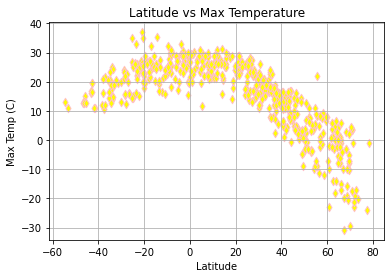

In [8]:
plt.scatter(weather_frame['Latitude'], weather_frame['Max Temp'], marker="d", facecolors="yellow", edgecolors="pink")

# Format graph
plt.title ("Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid()

## Latitude vs. Humidity Plot

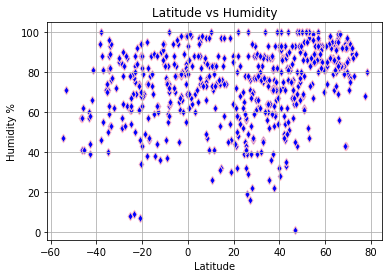

In [9]:
plt.scatter(weather_frame['Latitude'], weather_frame['Humidity'], marker="d", facecolors="blue", edgecolors="pink")

# Format graph
plt.title ("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

## Latitude vs. Cloudiness Plot

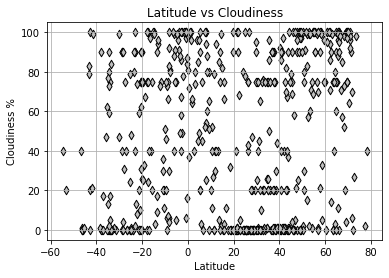

In [10]:
plt.scatter(weather_frame['Latitude'], weather_frame['Cloudiness'], marker="d", facecolors="silver", edgecolors="black")

# Format graph
plt.title ("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

## Latitude vs. Wind Speed Plot

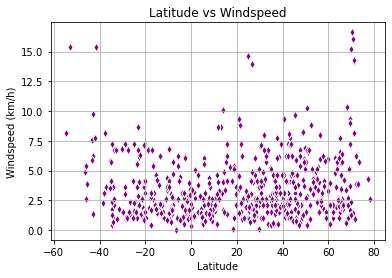

In [11]:
plt.scatter(weather_frame['Latitude'], weather_frame['Windspeed'], marker="d", facecolors="purple", edgecolors="white")

# Format graph
plt.title ("Latitude vs Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (km/h)")
plt.grid()

## Linear Regression

In [12]:
#create dataphrames for n and s hemispheres
n_hemisphere = weather_frame[(weather_data["Latitude"] >= 0)]
s_hemisphere = weather_frame[(weather_data["Latitude"] < 0)]
n_hemisphere
s_hemisphere

NameError: name 'weather_data' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#create linear regression formula to apply later

def line_reg(x,y):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"Correlation : {round(rvalue,2)}")
    best_plots = x * slope + intercept
    best_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker="d", facecolors="yellow", edgecolors="black")
    plt.plot(x,best_plots,linewidth = .99,color="purple")
    return best_equation

# create function to annotate
def annotate(best_equation, a, b):
    plt.annotate(best_equation,(a,b),fontsize=12)
    
    
    
# x and y values
xy = line_reg(n_hemisphere['Latitude'], n_hemisphere['Max Temp'])

# add regression formula
plt.annotate(xy,(-20,20),color="black")

# Formatting 
plt.title ("N. Hemisphere - Max Temperature (C) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save plot
plt.savefig("Output/Northern_Hemisphere_MaxTemp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# x and y values
xy = line_reg(s_hemisphere['Latitude'], s_hemisphere['Max Temp'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("S. Hemisphere - Max Temperature (C) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output/S_Hemisphere_MaxTemp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# x and y values
xy = line_reg(s_hemisphere['Latitude'], s_hemisphere['Humidity'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("N. Hemisphere - Humidity (C) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humdity %")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output/N_Hemisphere_Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# x and y values
xy = line_reg(s_hemisphere['Latitude'], s_hemisphere['Humidity'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("N. Hemisphere - Humidity (C) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humdity %")
plt.grid()

# Save 
plt.savefig("Output/S_Hemisphere_Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# x and y values
xy = line_reg(n_hemisphere['Latitude'], n_hemisphere['Cloudiness'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("N. Hemisphere - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")
plt.grid()

# Save 
plt.savefig("Output/N_Hemisphere_Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# x and y values
xy = line_reg(s_hemisphere['Latitude'], s_hemisphere['Cloudiness'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("S. Hemisphere - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")
plt.grid()

# Save 
plt.savefig("Output/S_Hemisphere_Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# x and y values
xy = line_reg(n_hemisphere['Latitude'], n_hemisphere['Windspeed'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("N. Hemisphere - Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.grid()

# Save 
plt.savefig("Output/N_Hemisphere_Windspeed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# x and y values
xy = line_reg(s_hemisphere['Latitude'], s_hemisphere['Windspeed'])

# add regression formula
plt.annotate(xy,(0,20),color="black")

# Formatting 
plt.title ("S. Hemisphere - Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Km/h)")
plt.grid()

# Save 
plt.savefig("Output/S_Hemisphere_Windspeed")